In [3]:
import os, glob, shutil
import urllib.request as r

def data_yuklab_olish(saqlash_uchun_papka, data_nomi = "salaries"): 
    
    data_nomlari = ["salaries", "exams", "college", "cars", "mall"]
    assert data_nomi in data_nomlari, f"Mavjud bo'lgan dataset {data_nomlari} dan birini kiriting!"
    
    if data_nomi == "college": url = "https://drive.google.com/file/d/1vwfMpQ4ikAI91zn1bWxP_Iqz7DTFUA9F/view?usp=sharing"
    elif data_nomi == "salaries": url = "https://drive.google.com/file/d/1p-XtX29fgXT9CzBfpHm3t8r028gQPRhe/view?usp=sharing"
    elif data_nomi == "exams": url = "https://drive.google.com/file/d/1TYN_sRmauaDgNYgQ-0VSHVAJvLoxKx2R/view?usp=sharing"
    elif data_nomi == "cars": url = "https://drive.google.com/file/d/1Fi5IPdfEktnKyf3dyHmnh84a2jiXl33A/view?usp=sharing"
    elif data_nomi == "mall": url = "https://drive.google.com/file/d/1eGWJVRNmGjfaH0o3dczBbNe_-RrW0_Jm/view?usp=sharing"
    
    full_path = f"{saqlash_uchun_papka}/{data_nomi}.zip"
    os.makedirs(saqlash_uchun_papka, exist_ok = True)

    # Download from the checkpoint path
    if os.path.isfile(f"{saqlash_uchun_papka}/{data_nomi}.csv"): print("Data yuklab olingan"); pass

    # If the checkpoint does not exist
    else: 
        print("Datani yuklash boshlanmoqda...")

        # Get file id
        file_id = url.split("/")[-2]

        # Initialize prefix to download
        prefix = "https://drive.google.com/uc?/export=download&id="

        # Download the checkpoint
        r.urlretrieve(f"{prefix + file_id}", f"{full_path}")
        shutil.unpack_archive(f"{full_path}", f"{saqlash_uchun_papka}")
        os.remove(full_path)

        files = sorted(glob.glob(f"{saqlash_uchun_papka}/*"), key = os.path.getctime)
        fname = os.path.basename(files[-1])
        os.rename(f"{saqlash_uchun_papka}/{fname}", f"{saqlash_uchun_papka}/{data_nomi}.csv")
        print(f"Data {saqlash_uchun_papka} papkasiga {data_nomi} nomi bilan yuklab olindi.")
        
data_yuklab_olish(saqlash_uchun_papka = "data", data_nomi = "exams")
data_yuklab_olish(saqlash_uchun_papka = "data", data_nomi = "college")
data_yuklab_olish(saqlash_uchun_papka = "data", data_nomi = "salaries")
data_yuklab_olish(saqlash_uchun_papka = "data", data_nomi = "cars")
data_yuklab_olish(saqlash_uchun_papka = "data", data_nomi = "mall")

Data yuklab olingan
Data yuklab olingan
Data yuklab olingan
Data yuklab olingan
Data yuklab olingan


In [38]:
import pandas as pd
data = pd.read_csv('data/salaries.csv')

import numpy as np
unique_locations = np.unique(data["company_location"])
print(unique_locations)
print(data.columns)
data.head(10)
print(data.columns)


['Algeria' 'Andorra' 'Argentina' 'Armenia' 'Australia' 'Austria' 'Bahamas'
 'Belgium' 'Bosnia and Herzegovina' 'Brazil' 'Canada'
 'Central African Republic' 'Chile' 'China' 'Colombia' 'Croatia'
 'Czech Republic' 'Denmark' 'Ecuador' 'Egypt' 'Estonia' 'Finland' 'France'
 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Honduras' 'Hong Kong' 'Hungary'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Kenya' 'Latvia' 'Lebanon' 'Lithuania' 'Luxembourg' 'Malaysia' 'Malta'
 'Mauritius' 'Mexico' 'Moldova' 'Netherlands' 'New Zealand' 'Nigeria'
 'Norway' 'Pakistan' 'Philippines' 'Poland' 'Portugal' 'Puerto Rico'
 'Qatar' 'Romania' 'Russia' 'Saudi Arabia' 'Singapore' 'Slovenia'
 'South Africa' 'South Korea' 'Spain' 'Sweden' 'Switzerland' 'Thailand'
 'Turkey' 'Ukraine' 'United Arab Emirates' 'United Kingdom'
 'United States' 'Vietnam']
Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
      

In [39]:
def clean_data(data, column_names, threshold = 10):

    for column_name in column_names:
        titles = list(data[column_name])
        di = {}

        for title in titles:
            if title not in di: 
               di[title] = 1
            else:
               di[title] += 1
        li = [key for (key, value) in di.items() if value < threshold]
        print(li)
        for name in li:
            mask = data[column_name] == name
            data = data[~mask] 
    return data

column_names = ["job_title", "company_location", "employee_residence"]
data_cleaned = clean_data(data = data, column_names = column_names)
print(len(data_cleaned))
print(len(data))

['Managing Director Data Science', 'Prompt Engineer', 'Business Intelligence Manager', 'Data Analytics Lead', 'Data Integration Engineer', 'Data Management Analyst', 'Machine Learning Operations Engineer', 'Marketing Data Scientist', 'Data Science Director', 'Machine Learning Modeler', 'Data Management Specialist', 'Business Intelligence Specialist', 'Data Quality Engineer', 'Financial Data Analyst', 'Data Strategy Manager', 'Data Visualization Engineer', 'Head of Machine Learning', 'Machine Learning Manager', 'AI Research Engineer', 'Data Operations Manager', 'Software Data Engineer', 'Compliance Data Analyst', 'Data Operations Specialist', 'Business Intelligence Data Analyst', 'AWS Data Architect', 'Product Data Analyst', 'Data Visualization Analyst', 'Cloud Data Engineer', 'Finance Data Analyst', 'Applied Machine Learning Engineer', 'Lead Data Analyst', 'BI Data Engineer', 'Cloud Database Engineer', 'Data Analytics Specialist', 'Machine Learning Research Engineer', 'Staff Data Analy

In [5]:
import pandas as pd
data = pd.read_csv('data/cars.csv')
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [1]:
import pandas as pd
data = pd.read_csv('data/college.csv')
data.head(10)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [3]:
import pandas as pd
data = pd.read_csv('data/mall.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
import pandas as pd
data = pd.read_csv('data/exams.csv')
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [46]:
import pandas as pd
tail_of_data = data.tail()
print(tail_of_data)

     gender race/ethnicity parental level of education         lunch  \
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
995               completed          88             99             95  
996                    none          62             55             55  
997               completed          59             71             65  
998               completed          68             78             77  
999                    none          77             86             86  


In [47]:

description = data.describe()
print(description)


       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [48]:

data_info = data.info()
print(data_info)
print(data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [49]:
def clean_data(data, column_names, threshold = 10):

    for column_name in column_names:
        titles = list(data[column_name])
        di = {}

        for title in titles:
            if title not in di: 
               di[title] = 1
            else:
               di[title] += 1
        li = [key for (key, value) in di.items() if value < threshold]
        print(li)
        for name in li:
            mask = data[column_name] == name
            data = data[~mask] 
    return data

column_names = [ "writing score", "math score", "reading score"]
data_cleaned = clean_data(data = data, column_names = column_names)
print(len(data_cleaned))
print(len(data))
print(data_cleaned.columns)

[93, 44, 92, 39, 28, 38, 48, 42, 49, 10, 34, 37, 41, 22, 45, 36, 89, 98, 40, 33, 27, 94, 95, 19, 35, 32, 96, 97, 99, 15, 30, 23]
[38, 40, 46, 44, 56, 97, 33, 39, 47, 43, 98, 51, 99, 83, 89, 42, 96, 94, 45, 86, 92, 85, 37, 90, 41, 35, 100, 91, 36, 29, 48, 95, 93]
[90, 54, 53, 89, 55, 47, 44, 100, 95, 43, 49, 88, 92, 51, 91, 50, 52, 99, 48, 87, 94, 46]
616
1000
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [50]:
features = ['gender', 'race/ethnicity', 'lunch','test preparation course', 'math score', 'reading score', 'writing score']
javob = ["parental level of education"] 

x,y = data_cleaned[features],data_cleaned[javob]
x.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,female,group B,standard,none,72,72,74
4,male,group C,standard,none,76,78,75
5,female,group B,standard,none,71,83,78
8,male,group D,free/reduced,completed,64,64,67
12,female,group B,standard,none,65,81,73


In [52]:
y.head(10)

,parental level of education
0,bachelor's degree
4,some college
5,associate's degree
8,high school
12,high school
13,some college
15,some high school
19,associate's degree
20,high school
21,some college


C:\Users\madam\AppData\Local\Temp\ipykernel_14508\1041117605.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 90)


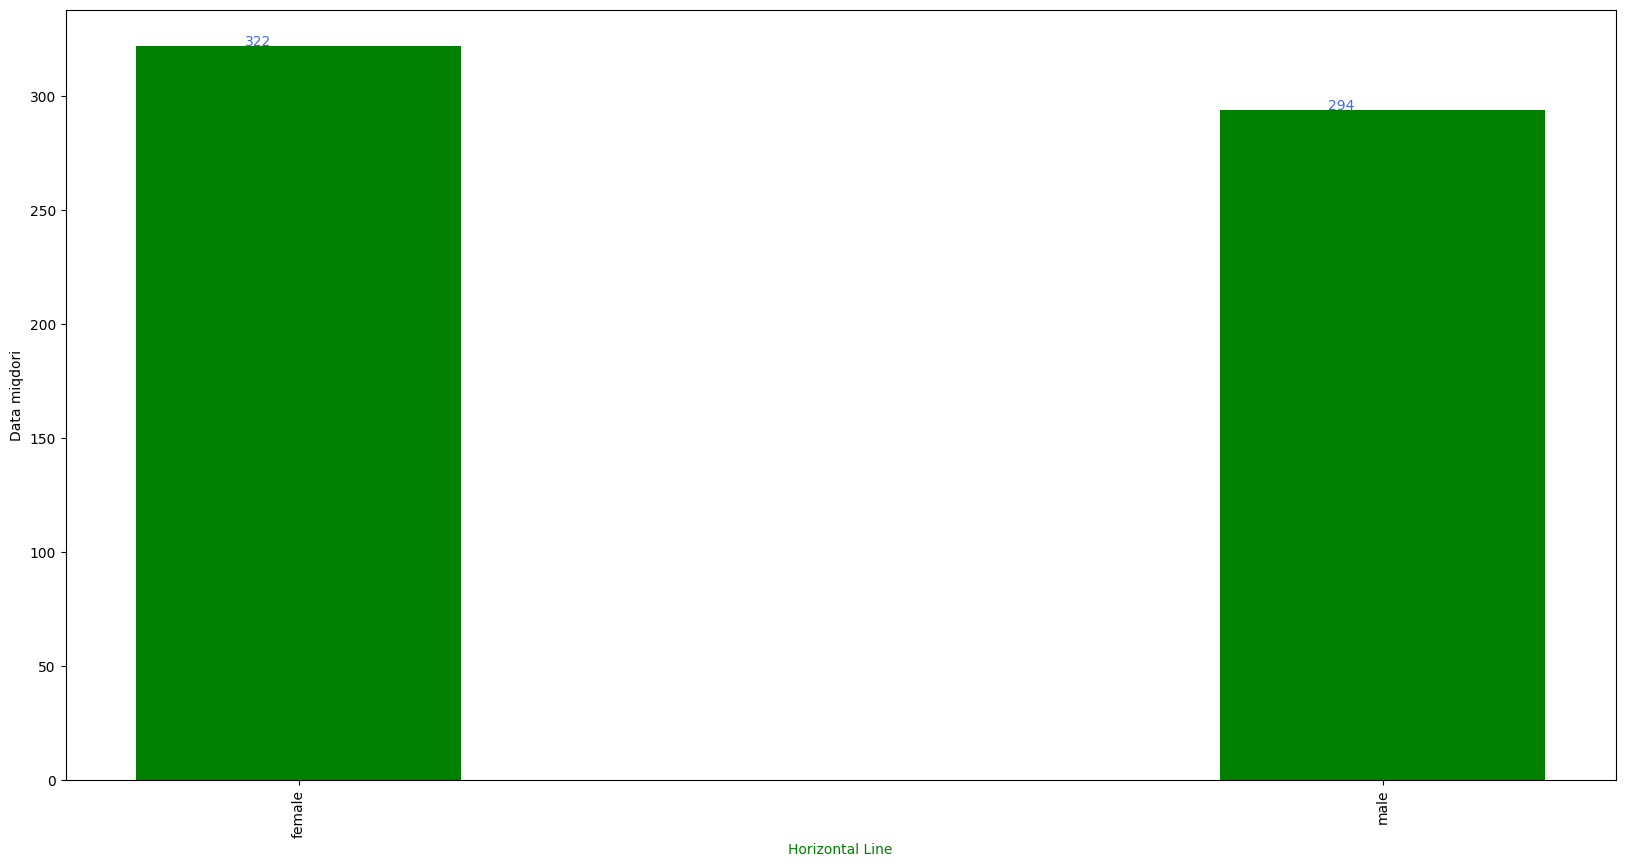

In [55]:
from matplotlib import pyplot as plt
import numpy as np

def data_analysis(df, column_name, color, text_width = 0.05):

    counts = df[column_name].value_counts().values
    cls_names = df[column_name].value_counts().keys()

    width, text_width, text_height = 0.3, text_width, 0.3

    fig,ax = plt.subplots(figsize = (20, 10))
    indices = np.arange(len(counts))

    ax.bar(indices, counts, width, color = color)
    ax.set_xlabel("Horizontal Line", color = color)
    ax.set_xticklabels(cls_names, rotation = 90)
    ax.set(xticks = indices, xticklabels = cls_names)
    ax.set_ylabel("Data miqdori", color = "black")

    for i, v in enumerate(counts): ax.text(i - text_width, v + text_height, str(v), color = "royalblue")


data_analysis(df = data_cleaned, column_name = "gender", color = "green", text_width = 0.05)

C:\Users\madam\AppData\Local\Temp\ipykernel_14508\1041117605.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 90)


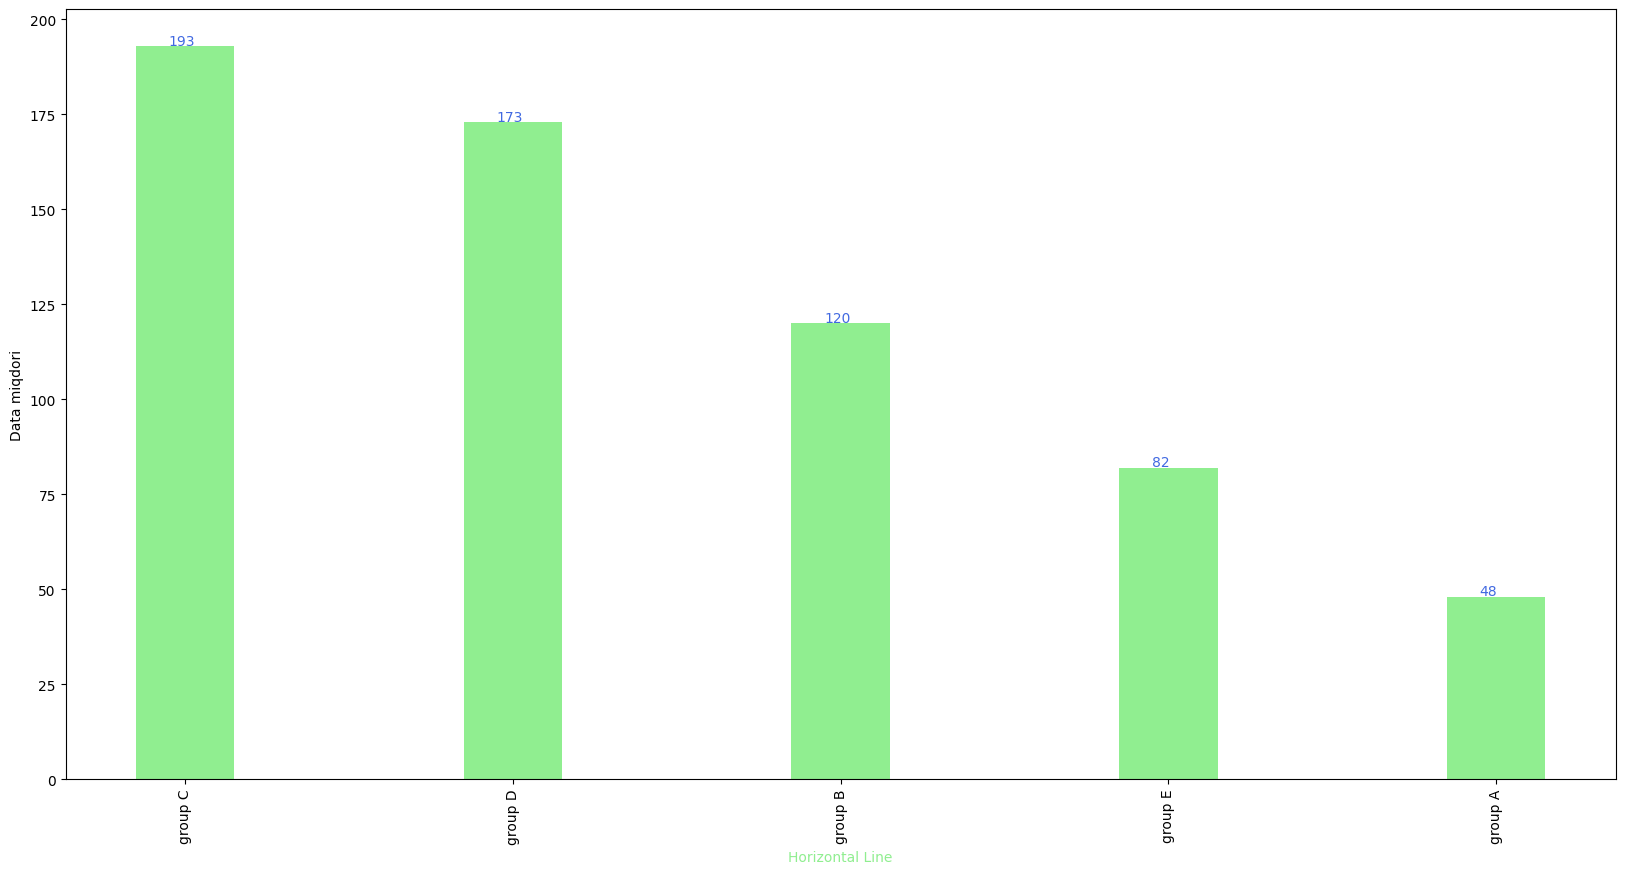

In [56]:
data_analysis(df = data_cleaned, column_name = "race/ethnicity", color = "lightgreen", text_width = 0.05)

C:\Users\madam\AppData\Local\Temp\ipykernel_14508\1041117605.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 90)


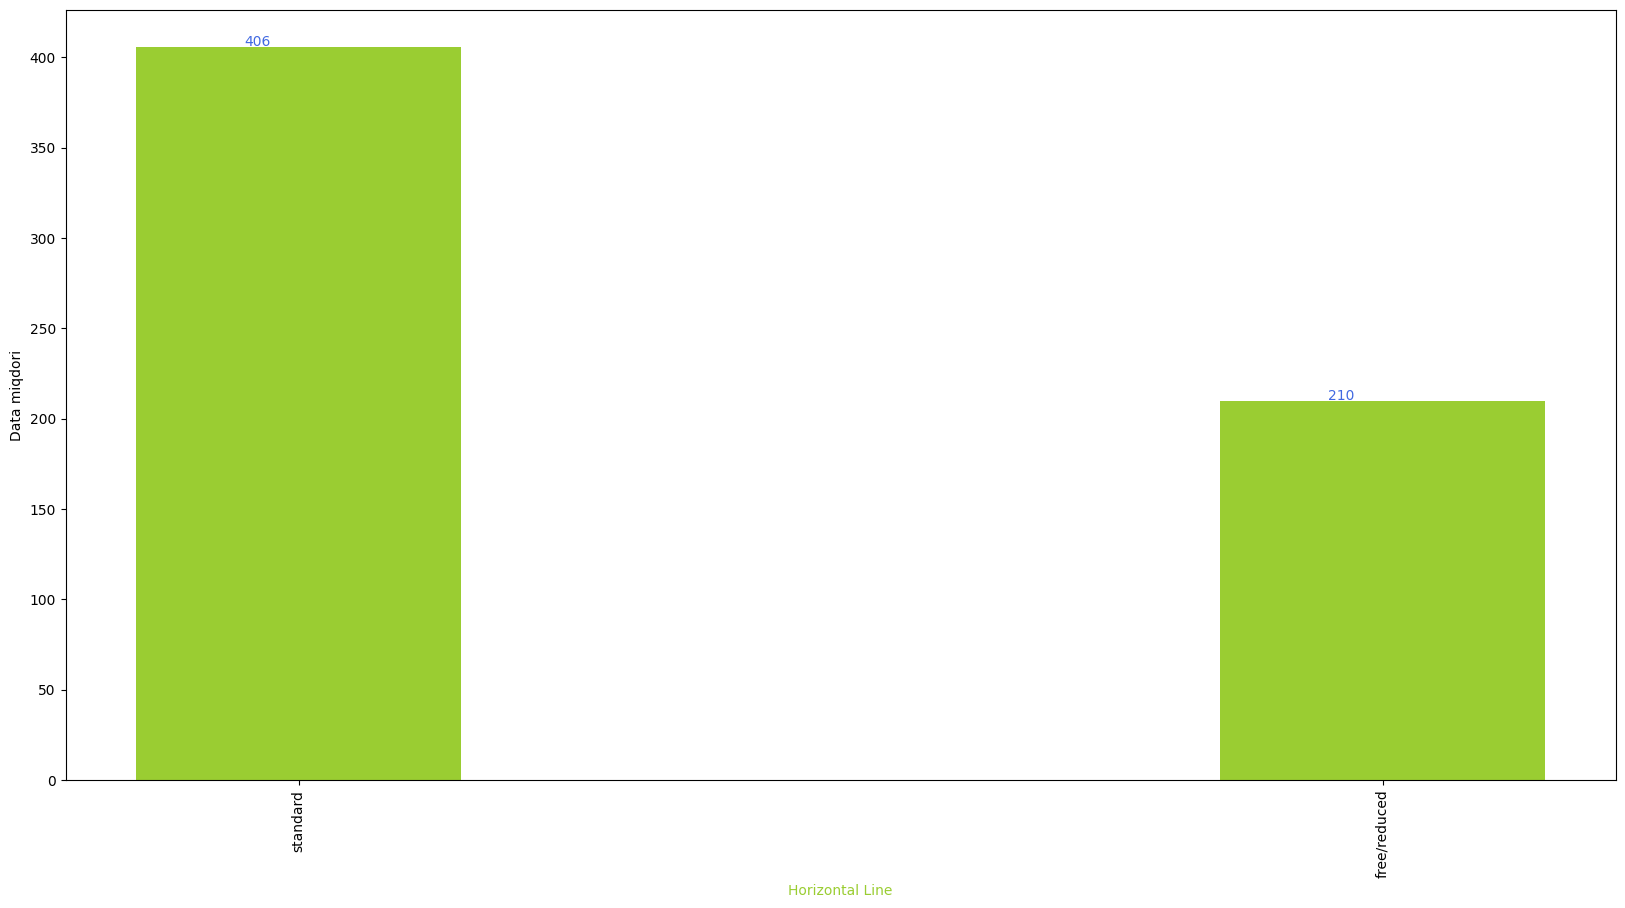

In [57]:
data_analysis(df = data_cleaned, column_name = "lunch", color = "yellowgreen", text_width = 0.05)

C:\Users\madam\AppData\Local\Temp\ipykernel_14508\1041117605.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 90)


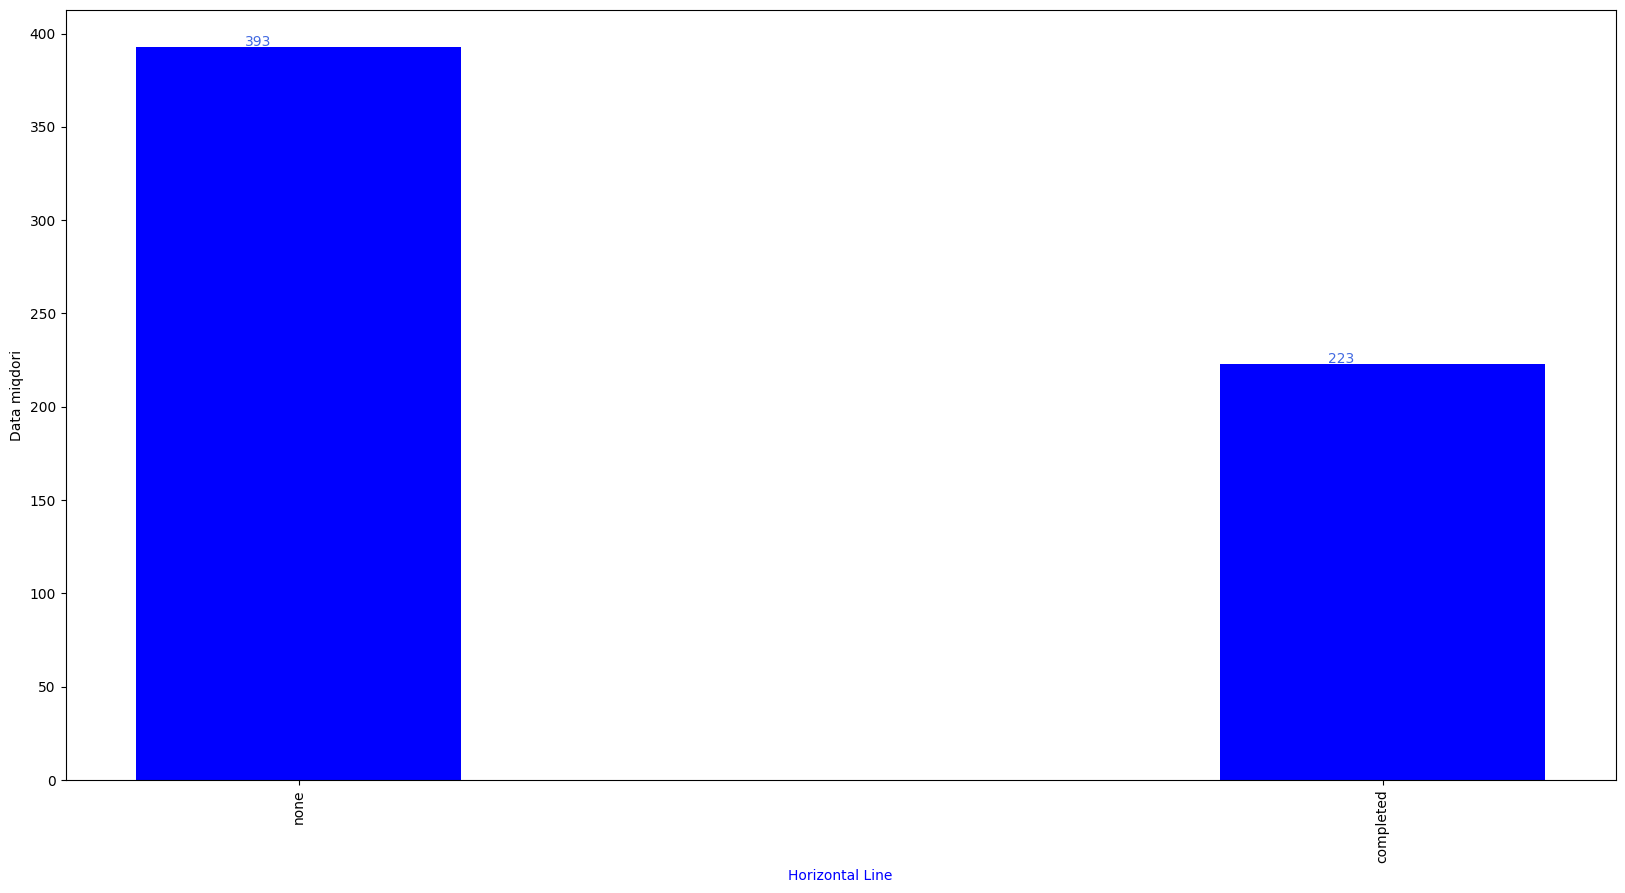

In [58]:
data_analysis(df = data_cleaned, column_name = "test preparation course", color = "blue", text_width = 0.05)

C:\Users\madam\AppData\Local\Temp\ipykernel_14508\1041117605.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 90)


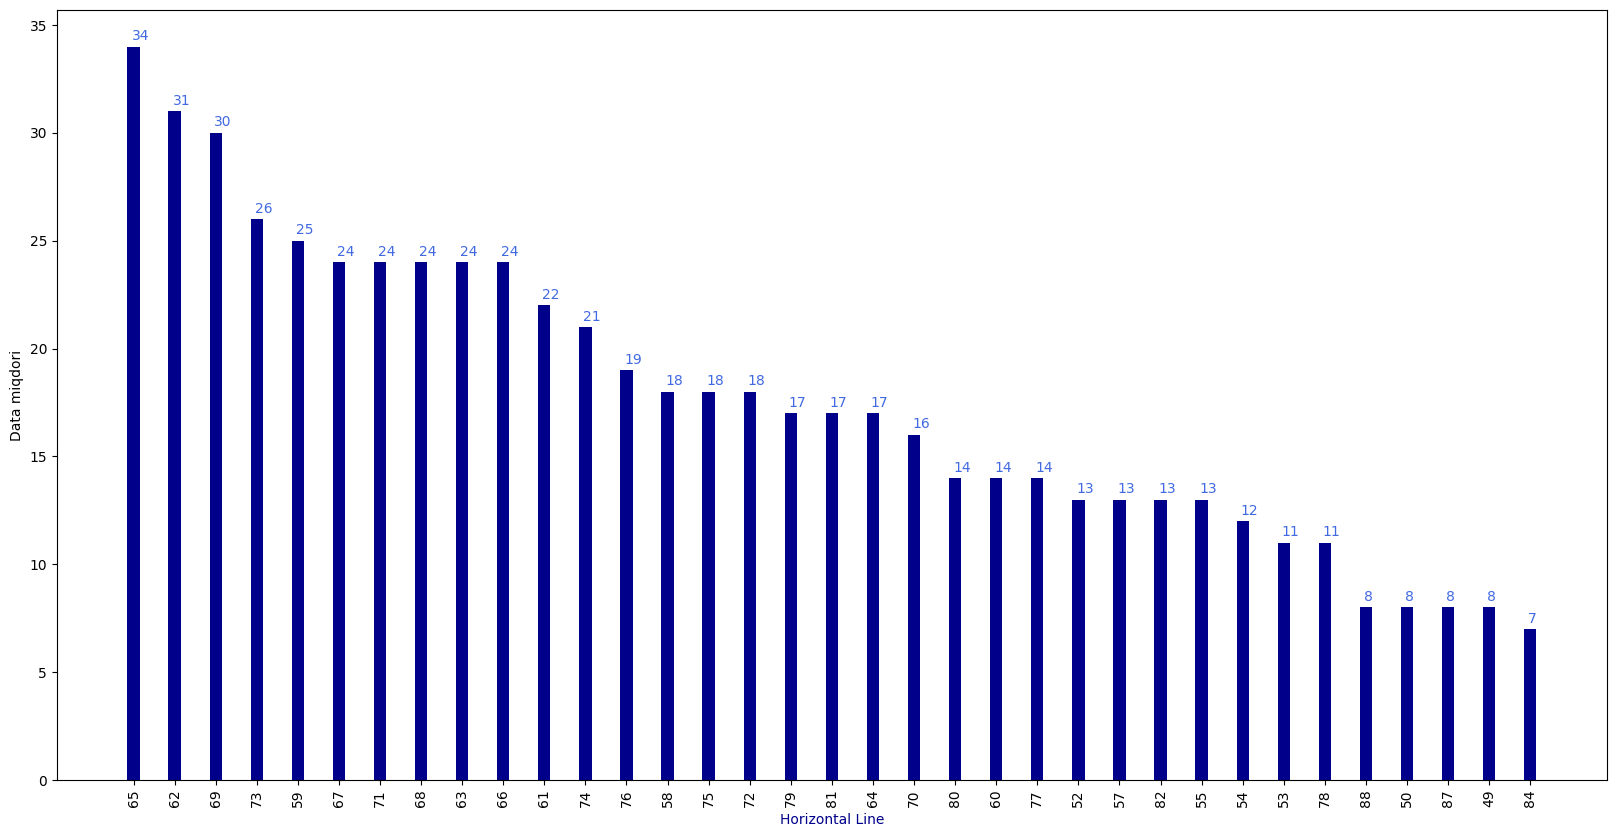

In [60]:
data_analysis(df = data_cleaned, column_name = "math score", color = "darkblue", text_width = 0.05)

C:\Users\madam\AppData\Local\Temp\ipykernel_14508\1041117605.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 90)


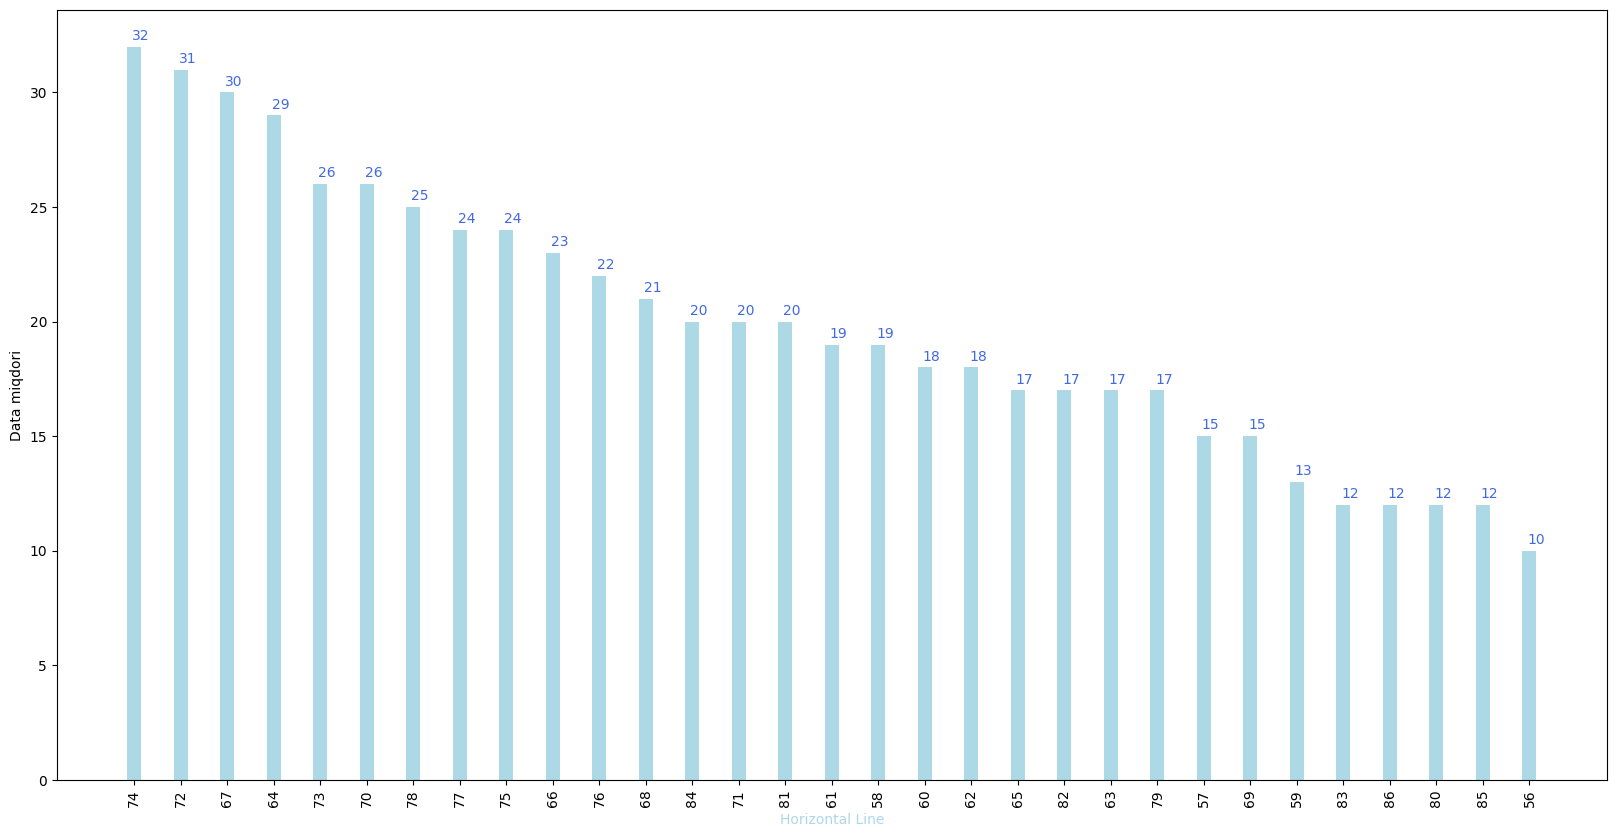

In [61]:
data_analysis(df = data_cleaned, column_name = "reading score", color = "lightblue", text_width = 0.05)

C:\Users\madam\AppData\Local\Temp\ipykernel_14508\1041117605.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 90)


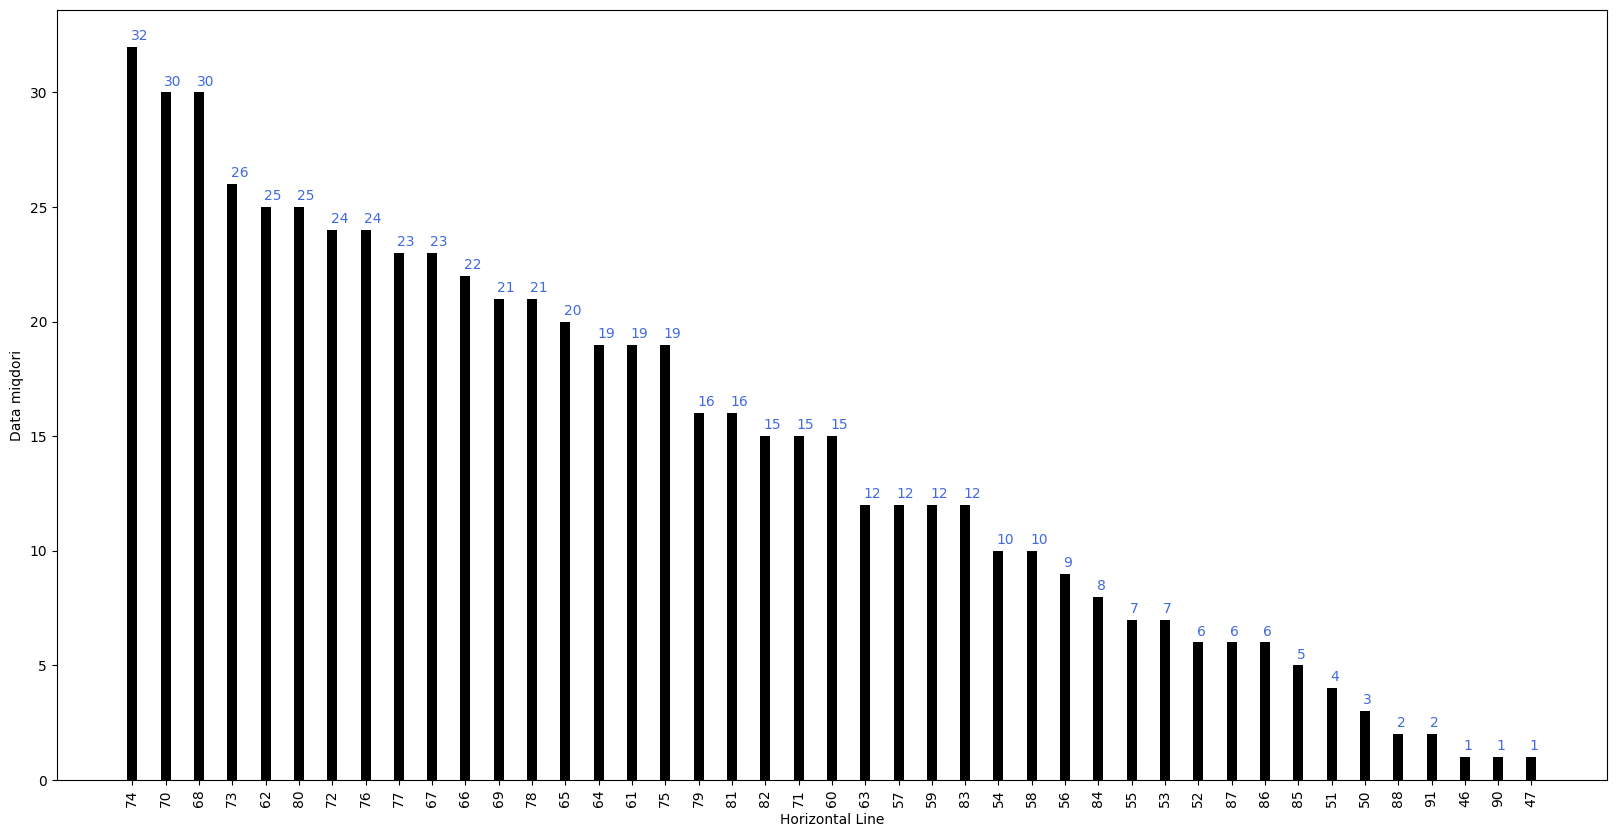

In [62]:
data_analysis(df = data_cleaned, column_name = "writing score", color = "black", text_width = 0.05)

C:\Users\madam\AppData\Local\Temp\ipykernel_14508\1041117605.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(cls_names, rotation = 90)


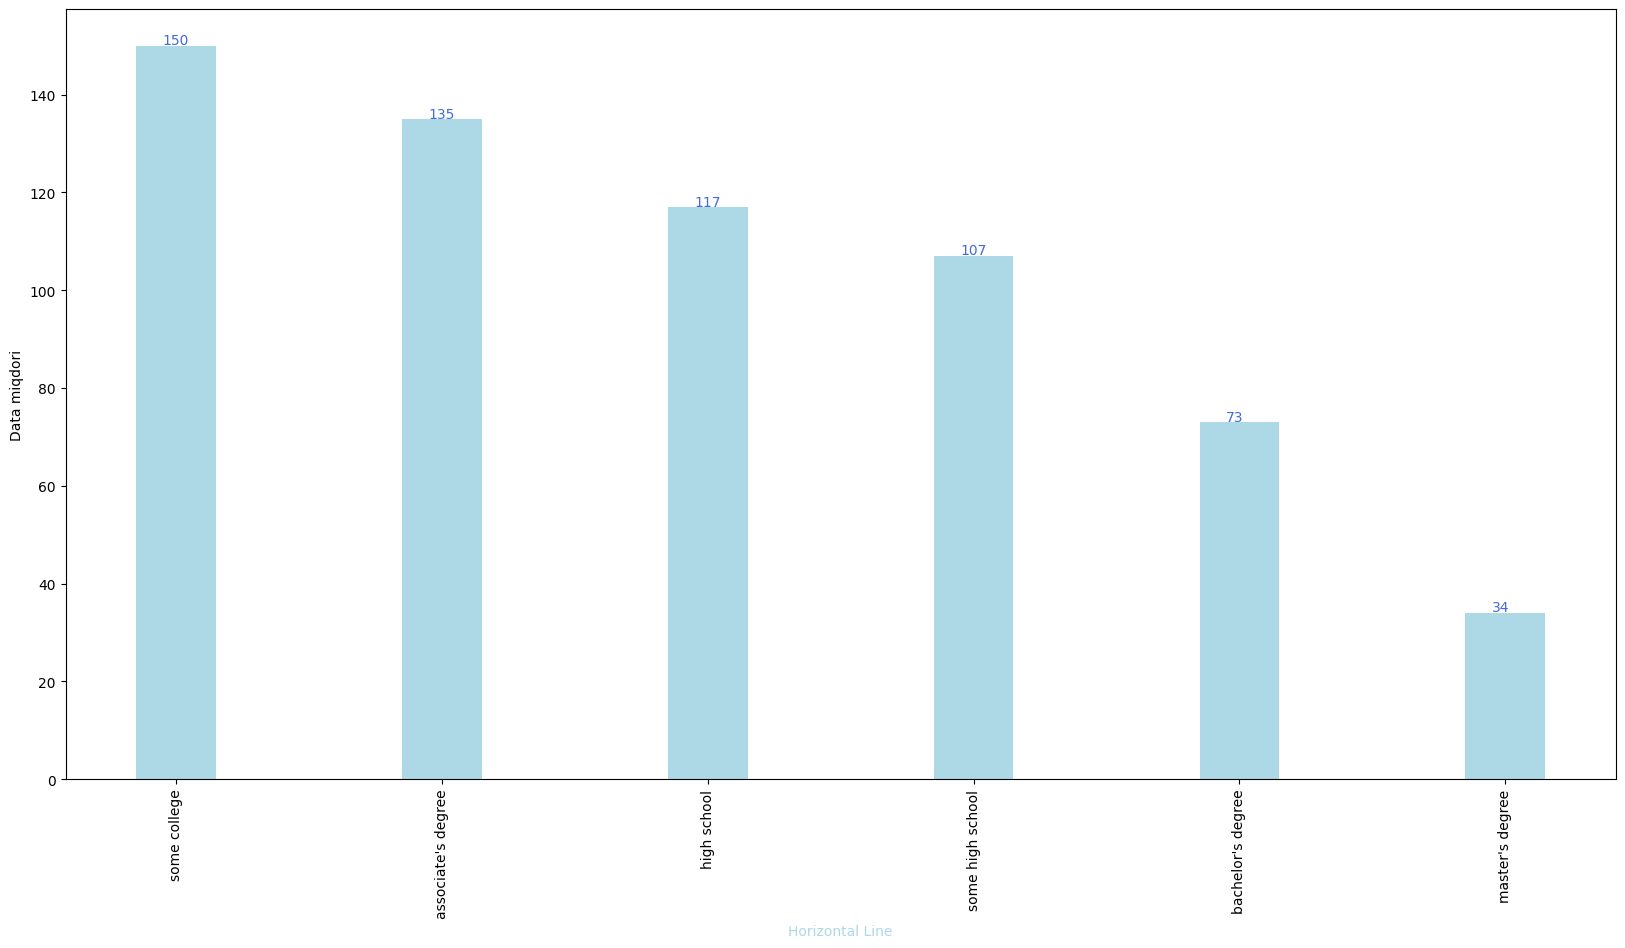

In [63]:
data_analysis(df = data_cleaned, column_name = "parental level of education", color = "lightblue", text_width = 0.05)

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
print(len(x_train))
print(len(x_test))


554
62


In [70]:
um_features = ['math score', 'reading score', 'writing score']
str_features = ['gender', 'race/ethnicity', 'lunch','test preparation course' 'math score', 'reading score', 'writing score']

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder

num_converter = Pipeline(steps = [("scaler", StandardScaler())])

str_converter = Pipeline(steps = [("onehot", StandardScaler())])
str_converter
num_converter

Pipeline(steps=[('scaler', StandardScaler())])

In [75]:
from sklearn.model_selection import train_test_split

x_test_all, x_train, y_test_all, y_train = train_test_split(x, y, test_size = 0.7)
x_test_all, x_validation, y_test_all, y_validation = train_test_split(x, y, test_size = 0.15)
x_test_all, x_test, y_test_all, y_test = train_test_split(x, y, test_size = 0.15)


print("Train set size:", len(x_train))
print("Validation set size:", len(x_validation))
print("Test set size:", len(x_test))

Train set size: 432
Validation set size: 93
Test set size: 93


In [76]:
from sklearn.model_selection import train_test_split

x_test_all, x_train, y_test_all, y_train = train_test_split(x, y, test_size = 0.6)
x_test_all, x_validation, y_test_all, y_validation = train_test_split(x, y, test_size = 0.2)
x_test_all, x_test, y_test_all, y_test = train_test_split(x, y, test_size = 0.2)


print("Train set size:", len(x_train))
print("Validation set size:", len(x_validation))
print("Test set size:", len(x_test))

Train set size: 370
Validation set size: 124
Test set size: 124


In [77]:
from sklearn.model_selection import train_test_split

x_test_all, x_train, y_test_all, y_train = train_test_split(x, y, test_size = 0.9)
x_test_all, x_validation, y_test_all, y_validation = train_test_split(x, y, test_size = 0.05)
x_test_all, x_test, y_test_all, y_test = train_test_split(x, y, test_size = 0.05)


print("Train set size:", len(x_train))
print("Validation set size:", len(x_validation))
print("Test set size:", len(x_test))

Train set size: 555
Validation set size: 31
Test set size: 31


In [78]:
from sklearn.model_selection import train_test_split

x_test_all, x_train, y_test_all, y_train = train_test_split(x, y, test_size = 0.5)
x_test_all, x_validation, y_test_all, y_validation = train_test_split(x, y, test_size = 0.25)
x_test_all, x_test, y_test_all, y_test = train_test_split(x, y, test_size = 0.25)


print("Train set size:", len(x_train))
print("Validation set size:", len(x_validation))
print("Test set size:", len(x_test))

Train set size: 308
Validation set size: 154
Test set size: 154


In [79]:
from sklearn.model_selection import train_test_split

x_test_all, x_train, y_test_all, y_train = train_test_split(x, y, test_size = 0.6)
x_test_all, x_validation, y_test_all, y_validation = train_test_split(x, y, test_size = 0.3)
x_test_all, x_test, y_test_all, y_test = train_test_split(x, y, test_size = 0.1)


print("Train set size:", len(x_train))
print("Validation set size:", len(x_validation))
print("Test set size:", len(x_test))

Train set size: 370
Validation set size: 185
Test set size: 62


In [80]:
from sklearn.model_selection import train_test_split

x_test_all, x_train, y_test_all, y_train = train_test_split(x, y, test_size = 0.7)
x_test_all, x_validation, y_test_all, y_validation = train_test_split(x, y, test_size = 0.25)
x_test_all, x_test, y_test_all, y_test = train_test_split(x, y, test_size = 0.05)


print("Train set size:", len(x_train))
print("Validation set size:", len(x_validation))
print("Test set size:", len(x_test))

Train set size: 432
Validation set size: 154
Test set size: 31
